In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv("exercise_data.csv")
data_matrix = np.array(data)

print(data_matrix.shape)
print(data)

(150, 3)
     distance  rhr  zone mins
0        4.69   69          0
1        3.26   69          7
2        9.05   69         59
3        7.88   65         80
4       10.00   63         67
..        ...  ...        ...
145      7.90   57          3
146      7.66   60         35
147      9.12   60         33
148      5.56   59         64
149      8.81   61         41

[150 rows x 3 columns]


In [ ]:
ones = np.ones(150)
X = np.column_stack((ones, data_matrix[:, 0], data_matrix[:, 2]))
t = data_matrix[:, 1]

print(X.shape)

(150, 3)


In [ ]:
X_train = X[:75]
t_train = t[:75]
X_valid = X[75:125]
t_valid = t[75:125]
X_test = X[125:]
t_test = t[125:]
W = np.array([1, 1, 1])

print(W.shape)

(3,)


In [ ]:
def compute_gradient(X, t, W):
  y = np.dot(X, W)
  loss = y - t
  gradient = np.dot(X.T, loss)
  gradient = gradient/X.shape[0]
  return gradient

def compute_loss(X, t, W):
  y = np.dot(X, W)
  res = y - t
  sum = np.dot(np.transpose(res), res)
  return sum/(2 * X.shape[0])

g = compute_gradient(X_train, t_train, W)
l = compute_loss(X_train, t_train, W)
print(g)

[  10.46693333  322.64393067 4499.2564    ]


In [ ]:
def train_gd(X, t, W, r, iter):
  loss = []
  for i in range(iter):
    l = compute_loss(X, t, W)
    loss.append(l)
    g = compute_gradient(X, t, W)
    print(f"weight - {W} == {i* 100/iter}%")
    W = W - (r * g)
  plt.title("Loss Accross Each Iteration")
  plt.plot(loss, label="Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
  print(f"Final Training loss: {loss[-1]}")
  return W



Streaming output truncated to the last 5000 lines.
weight - [20.595054    5.35123125 -0.2045077 ] == 95.0%
weight - [20.59511784  5.3512232  -0.2045074 ] == 95.001%
weight - [20.59518169  5.35121514 -0.2045071 ] == 95.002%
weight - [20.59524554  5.35120709 -0.2045068 ] == 95.003%
weight - [20.59530938  5.35119904 -0.20450651] == 95.004%
weight - [20.59537323  5.35119098 -0.20450621] == 95.005%
weight - [20.59543708  5.35118293 -0.20450591] == 95.006%
weight - [20.59550093  5.35117488 -0.20450561] == 95.007%
weight - [20.59556477  5.35116682 -0.20450531] == 95.008%
weight - [20.59562862  5.35115877 -0.20450502] == 95.009%
weight - [20.59569247  5.35115072 -0.20450472] == 95.01%
weight - [20.59575631  5.35114267 -0.20450442] == 95.011%
weight - [20.59582016  5.35113461 -0.20450412] == 95.012%
weight - [20.595884    5.35112656 -0.20450382] == 95.013%
weight - [20.59594785  5.35111851 -0.20450353] == 95.014%
weight - [20.5960117   5.35111045 -0.20450323] == 95.015%
weight - [20.59607554  5

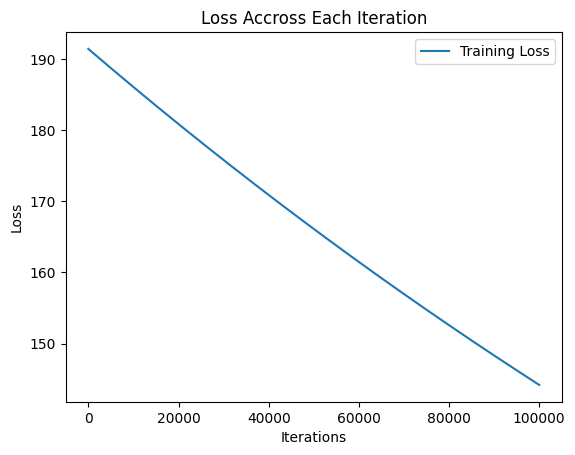

Final Training loss: 144.17564405360628


In [ ]:
W = train_gd(X_train, t_train, W, 0.00001, 100000)

In [ ]:
v_loss = compute_loss(X_valid, t_valid, W)
print(v_loss)

21505.043715320113


In [ ]:
def predict(dist, mins):
  x = np.array([1, dist, mins])
  print(W)
  print(x)
  return np.dot(x, W)



[62.15063308  0.1514558  -1.07361673]
[1.   3.26 7.  ]
55.129061921405174


In [ ]:
epsilon = 0.0001

fets = np.column_stack((X_train[:, 1], X_train[:, 2]))
fets_mean = np.mean(fets, axis=0)
fets_std = np.std(fets, axis=0)
fets_norm = (fets - fets_mean)/(fets_std + epsilon)

fets_valid = np.column_stack((X_valid[:, 1], X_valid[:, 2]))
fets_valid_mean = np.mean(fets, axis=0)
fets_valid_std = np.std(fets, axis=0)
fets_valid_norm = (fets_valid - fets_valid_mean)/(fets_valid_std + epsilon)

X_train_norm = np.stack((np.ones(75), fets_norm[:, 0], fets_norm[:, 1]))
X_train_norm = X_train_norm.T
X_valid_norm = np.stack((np.ones(50), fets_valid_norm[:, 0], fets_valid_norm[:, 1]))
X_valid_norm = X_valid_norm.T
print(X_train_norm)



[[ 1.         -1.04416167 -1.05563246]
 [ 1.         -1.38018453 -0.93880973]
 [ 1.         -0.01964441 -0.07098372]
 [ 1.         -0.29457221  0.27948448]
 [ 1.          0.20358756  0.06252798]
 [ 1.         -0.2005798   0.02915005]
 [ 1.         -1.10290692 -0.88874284]
 [ 1.         -1.535272   -0.98887661]
 [ 1.         -0.75983463 -0.22118437]
 [ 1.          0.19653813 -0.10436164]
 [ 1.          0.33987655  0.73008645]
 [ 1.         -0.7527852  -0.67178634]
 [ 1.         -0.76218444 -0.58834153]
 [ 1.         -1.19454952 -0.42145191]
 [ 1.         -0.64939355 -0.38807399]
 [ 1.         -1.0065647  -0.88874284]
 [ 1.         -1.04181186 -0.33800711]
 [ 1.         -0.7292871   0.19603967]
 [ 1.         -0.95016926 -0.62171946]
 [ 1.         -0.47080797 -1.05563246]
 [ 1.         -1.15225294 -0.98887661]
 [ 1.         -0.45670911  0.54650787]
 [ 1.         -0.09718815 -1.02225454]
 [ 1.         -0.36741633  0.16266175]
 [ 1.         -1.57521878 -1.00556558]
 [ 1.         -0.51075475

Streaming output truncated to the last 5000 lines.
weight - [62.11118659  0.16415365 -1.08624514] == 95.0%
weight - [62.11119468  0.1641511  -1.0862426 ] == 95.001%
weight - [62.11120277  0.16414854 -1.08624006] == 95.002%
weight - [62.11121086  0.16414599 -1.08623752] == 95.003%
weight - [62.11121895  0.16414344 -1.08623499] == 95.004%
weight - [62.11122703  0.16414089 -1.08623245] == 95.005%
weight - [62.11123512  0.16413834 -1.08622991] == 95.006%
weight - [62.11124321  0.16413578 -1.08622737] == 95.007%
weight - [62.1112513   0.16413323 -1.08622484] == 95.008%
weight - [62.11125938  0.16413068 -1.0862223 ] == 95.009%
weight - [62.11126747  0.16412813 -1.08621976] == 95.01%
weight - [62.11127556  0.16412557 -1.08621722] == 95.011%
weight - [62.11128365  0.16412302 -1.08621468] == 95.012%
weight - [62.11129173  0.16412047 -1.08621215] == 95.013%
weight - [62.11129982  0.16411792 -1.08620961] == 95.014%
weight - [62.11130791  0.16411536 -1.08620707] == 95.015%
weight - [62.11131599  0

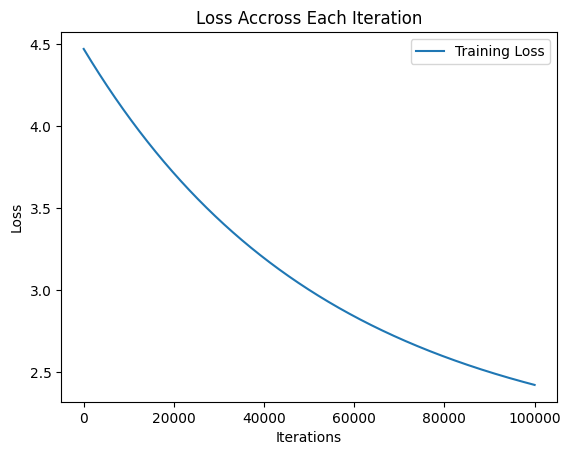

Final Training loss: 2.4237218694889453
3.625347132250962


In [ ]:
W = train_gd(X_train_norm, t_train, W, 0.00001, 100000)
v_loss = compute_loss(X_valid_norm, t_valid, W)
print(v_loss)

In [ ]:
t_loss = compute_loss()

[62.15063308  0.1514558  -1.07361673]
[ 1  6 70]
-12.093802898793676
